# Qiskit: Basics on Python and Quantum Computing
### By: Mushfika Rahman

## Quantum Hello world!

We import the libraries or modules

In [1]:
!pip install pylatexenc
!pip3 install qiskit==0.36.0
!pip install qiskit
!pip install qiskit-ibm-runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 4.9 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=4589337b83addd909956b93b7de910e0e954eb102fd3abd367773ea2d3383b7e
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 5.2 MB/s 
     |████████████████████████████████| 18.0 MB 6.4 MB/s 
     |████████████████████████████████| 240 kB 71.2 MB/s 
     |████████████████████████████████| 200 kB 71.0 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 112 kB 45.6 MB/s 
     |████████████████████████████████| 1.6 MB 44.6 MB/s 
     |████████████████████████████████| 943 kB 

In [23]:
from qiskit import *

We introduce a line to draw the graphs in the nb

In [24]:
%matplotlib inline

We introduce the next line to know more about the environment.

In [25]:
!pip3 freeze | grep qiskit 

qiskit==0.37.0
qiskit-aer==0.10.4
qiskit-ibm-runtime==0.6.2
qiskit-ibmq-provider==0.19.2
qiskit-ignis==0.7.0
qiskit-ionq==0.3.5
qiskit-terra==0.21.0


We create the quantum and classical registers

In [26]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

To add the last registers in the circuit

In [27]:
circuit = QuantumCircuit(qr,cr)

We draw the circuit through two ways
1. basic

In [28]:
        circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

2. medium

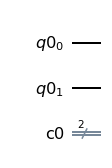

In [29]:
        circuit.draw(output='mpl')

## Example

In [30]:
qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')
circuit = QuantumCircuit(qr,cr)
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

## Apply a gate in the circuit

We apply the Hadamard gate (H-gate is _superposition_ same probability):
1. circuit.h(qr): for all quantum registers
2. circuit.h(qr[i]): for the i-quantum register.

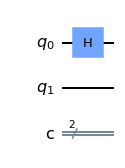

In [31]:
circuit.h(qr[0])
circuit.draw(output='mpl')

## Multiqbit Gates

We add the X-gate (control not or control-X, which is entanglement):
1. circuit.cx[qr[0],qr[1]].

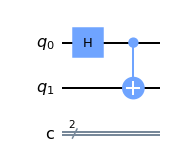

In [32]:
circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

Now, we measure:

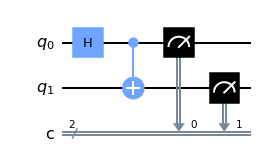

In [33]:
circuit.measure(qr,cr)
circuit.draw(output='mpl')

### Concepts

1. Backend is the environment where we can simulate one quantum computer.
2. Pay (time or money) in the tons of works before yours.

## Some quantum computers:
- ibmq_16_melbourne
- ibmq_london
- etc.

We create the _backend_:

In [34]:
bcknd = Aer.get_backend('qasm_simulator')

We execute and get the result:

In [35]:
rslt = execute(circuit, backend=bcknd).result()

And call the modules/libraries to plot the histogram

In [36]:
from qiskit.tools.visualization import plot_histogram

Draw the histogram

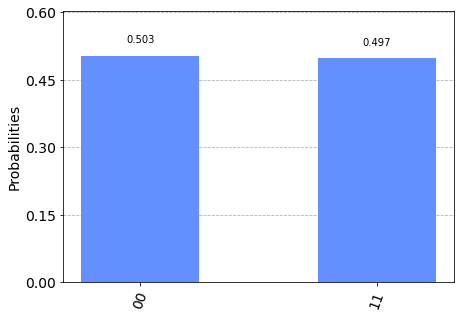

In [37]:
plot_histogram(rslt.get_counts(circuit))

## How to use the Quantum Computer real

In [17]:
!pip install qiskit-ionq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 0.2.3.5 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.


In [1]:
!pip install qiskit-ibmq-provider

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 240 kB 5.2 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.0-py3-none-any.whl size=12028 sha256=24ba2f4db6c2f26de2ed33d109b9395cfa63d353ce4ad9f9a20a194f40c894f4
  Stored in directory: /root/.cache/pip/wheels/ed/f9/fa/3ed81abb79590bf4c0432e7816bcdf3f0dbd1ba5aeb3eeddf7
Successfully built qiskit
  Attempting uninstall: qiskit-ibmq-provider
    Found existing installation: qiskit-ibmq-provider 0.19.0
    Uninstalling qiskit-ibmq-provider-0.19.0:
      Successfully uninstalled qiskit-ibmq-provider-0.19.0
  Attempting uninstall: qiskit
    Found existing installation: qiskit 0.36.0
    Uninstalling qiskit-0.36.0:
      Successfully uninstalled qiskit-0.36.0


We are going to connect with ourself account (I changed my token, you should do same)

In [7]:
from qiskit import IBMQ

In [4]:
#IBMQ.load_account() 
IBMQ.providers()

[]

In [9]:

IBMQ.save_account('763f3d42e3016709be48fe645fc6bc9eb32905081ebac3f67c123f8278785d9231ee392a323554b6e0efac1c36d7cd24ef5ab2f506cef6ff3d1fe69a4d02b56f')


In [10]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

We can see different quantum computers to execute the algorithm/circuit.

In [11]:
prvdr=IBMQ.get_provider(group='open')
prvdr.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

Remember it is important to know the quantum computer arqchitecture.
**Hint:** go to ref. 4 to see the jobs in the computing.

In [12]:
prvdr=IBMQ.get_provider('ibm-q')
qcomp=prvdr.get_backend('ibmq_belem')

Execute the circuit in the quantum computer.

In [38]:
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
job=execute(circuit, backend=qcomp)

import the tools to show the results

In [39]:
from qiskit.tools.monitor import job_monitor

To know the job status.

In [ ]:
job_monitor(job)

Job Status: job is queued (8) 

Assign the result to new variable.

In [ ]:
rslt=job.result()

Draw the histogram

In [ ]:
plot_histogram(rslt.get_counts(circuit))

# Exercise

1. Use your account, and your token and re run this NB. 
2. Reproduce this NB with 3 qubits, use the simulator and the quantum computer.
3. Use another provider.
4. Compare and analyze your results. 
5. Write a report. Instructions during the course.

I left some gifs to help with the token and the provider selection.

In [ ]:
qr = QuantumRegister(3,'q')
cr = ClassicalRegister(3,'c')
circuit = QuantumCircuit(qr,cr)
circuit.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 3/

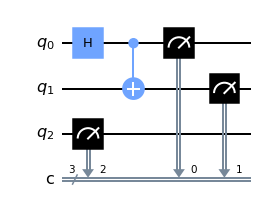

In [ ]:
circuit.h(qr[0])
circuit.draw(output='mpl')

circuit.cx(qr[0],qr[1])
circuit.draw(output='mpl')

circuit.measure(qr,cr)
circuit.draw(output='mpl')

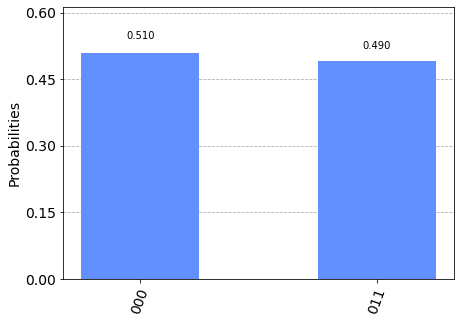

In [ ]:
bcknd = Aer.get_backend('qasm_simulator')
rslt = execute(circuit, backend=bcknd).result()

from qiskit.tools.visualization import plot_histogram
plot_histogram(rslt.get_counts(circuit))

In [ ]:
!pip install qiskit-ionq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from qiskit_ionq import IonQProvider
provider = IonQProvider("fV4Mzx5NUvzgQg305Rh92FT2OsOjz6iy")

In [ ]:
print(provider.backends())

[<IonQSimulatorBackend('ionq_simulator')>, <IonQQPUBackend('ionq_qpu')>]


In [ ]:
print(provider.backends()[0].name())
print(provider.backends()[1].name())

ionq_simulator
ionq_qpu


In [ ]:
qcomp = provider.get_backend('ionq_qpu')
job = execute(circuit, backend=qcomp)

In [ ]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)

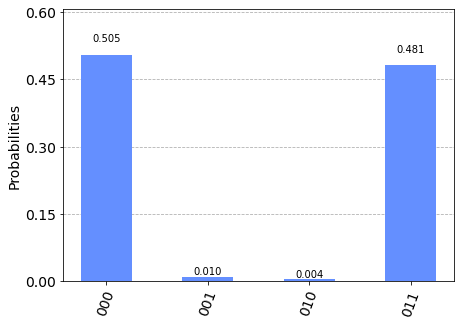

In [ ]:
rslt = job.result()

plot_histogram(rslt.get_counts(circuit))

<img src="../GIF/quantumIBM_token_a.gif" width="350" align="center">

<img src="../GIF/quantumIBM_token_B.gif" width="350" align="center">

In [ ]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

# References


1. Qiskit tutorial: https://qiskit.org/documentation/install.html
2. Github tutorial: https://github.com/Qiskit/qiskit-iqx-tutorials
3. youtube video: https://www.youtube.com/watch?v=L4jYKGrxKRE&feature=youtu.be
4. IBM account: https://quantum-computing.ibm.com/
<!--
https://quantum-computing.ibm.com/
My count with gmail in ciencias.unam
and Github
-->